# Calculate Collisons per second at sea level
#### Mean Free Path (λ): 6.45e-08 meters
#### Average Thermal Speed (v_avg): 466.53 meters/second
#### Number of Collisions per Second: 7.23e+09 collisions/second
#### time to collide: 1.5 e-10 seconds

In [5]:
# This is collisions between gas particles. 
# It is different to photon mean-free-paht
import math
# Constants
k_B = 1.38e-23; # Boltzmann constant in J/K
T = 288; # Temperature at sea level in Kelvin
d = 3.7e-10; # Diameter of a nitrogen molecule in meters
P = 101325; # Pressure at sea level in Pascals
m = 4.65e-26; # Mass of a nitrogen molecule in kg
pi = math.pi; # Value of Pi
# P = n.k_B. T
n = P/(k_B * T)
# for collision there 2 particles will touch with centers d apart. 
#. v_relAvg = sqrt(2) v_avg 
#mean free path = (k_B * T) / (sqrt(2) * pi * d^2 * P)


# ====================================================================================================
# Number density of air molecules (n_air): 2.446e+25 molecules/m³
# Number density of CO₂ molecules (n_CO2): 9.783e+21 molecules/m³
# # Spectral radiance (B_lambda): 6.693e+06 W·m⁻²·sr⁻¹·m⁻¹
# Spectral photon flux density (N_lambda): 5.054e+26 photons·m⁻²·s⁻¹·m⁻¹
# Total photon flux (Phi_total): 5.054e+20 photons·m⁻²·s⁻¹
# Absorption rate per CO₂ molecule (R): 5.054e-02 s⁻¹
# Average time between photon absorptions (tau): 19.79 seconds

# Step 1: Mean free path calculation
def meanFreePath(k_B, T, d, P):
    return (k_B * T) / (math.sqrt(2) * pi * math.pow(d, 2) * P)


# Step 2: Thermal speed calculation
def thermalSpeed(k_B, T, m):
    return math.sqrt((8 * k_B * T) / (pi * m))

# Step 3: Number of collisions per second
def numberOfCollisions(v_avg, lamda):
    return v_avg / lamda

# Calculate the mean free path (lamda)
lamda = meanFreePath(k_B, T, d, P)

# Calculate the average thermal speed (v_avg)
v_avg = thermalSpeed(k_B, T, m)

# Calculate the number of collisions per second (Z)
collisionsPerSecond = numberOfCollisions(v_avg, lamda)
tau_collide = 1/collisionsPerSecond

# Output the results
print(f'Mean Free Path (λ): {round(lamda,10)} meters')
print(f'Average Thermal Speed (v_avg): {round(v_avg,2)} meters/second')
print(f'Number of Collisions per Second: {'{:.2e}'.format(collisionsPerSecond)} collisions/second')
print(f'time to collide: {'{:.2e}'.format(tau_collide)} seconds')
print(f'It takes ~3 clock ticks to reach steady state: {3*tau_collide} seconds')


Mean Free Path (λ): 6.45e-08 meters
Average Thermal Speed (v_avg): 466.53 meters/second
Number of Collisions per Second: 7.23e+09 collisions/second
time to collide: 1.38e-10 seconds
It takes ~3 clock ticks to reach steady state: 4.14694743081231e-10 seconds


In [5]:
# now calculate collisions per second at various altitudes
import numpy as np

# Physical constants
k_B = 1.380649e-23        # Boltzmann constant (J/K)
NA = 6.02214076e23        # Avogadro's number (1/mol)
M_air = 28.97e-3          # Molar mass of dry air (kg/mol)
m_air = M_air / NA        # Average mass of air molecule (kg)
sigma_coll = 3.64e-19     # Effective collision cross-section (m²)

# Altitude settings
altitudes_km = np.arange(0, 101, 5)  # Altitudes from 0 km to 100 km every 5 km

# Standard atmosphere parameters extended to 100 km
# Temperature lapse rates (K/m) and base temperatures (K) for atmospheric layers
layers = [
    {'base_altitude': 0e3,        'lapse_rate': -6.5e-3,  'base_temp': 288.15, 'base_pressure': 101325},
    {'base_altitude': 11e3,       'lapse_rate': 0.0,      'base_temp': 216.65},
    {'base_altitude': 20e3,       'lapse_rate': 1.0e-3,   'base_temp': 216.65},
    {'base_altitude': 32e3,       'lapse_rate': 2.8e-3,   'base_temp': 228.65},
    {'base_altitude': 47e3,       'lapse_rate': 0.0,      'base_temp': 270.65},
    {'base_altitude': 51e3,       'lapse_rate': -2.8e-3,  'base_temp': 270.65},
    {'base_altitude': 71e3,       'lapse_rate': -2.0e-3,  'base_temp': 214.65},
    {'base_altitude': 84.852e3,   'lapse_rate': 0.0,      'base_temp': 186.87},
    {'base_altitude': 100e3,      'lapse_rate': 3.0e-3,   'base_temp': 186.87},  # Simplified extension
]

def get_temperature_pressure(altitude):
    """Calculate temperature and pressure at a given altitude using the standard atmosphere model."""
    g0 = 9.80665          # Gravity acceleration (m/s²)
    R = 287.058           # Specific gas constant for dry air (J/(kg·K))

    # Find the atmospheric layer for the given altitude
    for i in range(len(layers)-1, -1, -1):
        if altitude >= layers[i]['base_altitude']:
            layer = layers[i]
            break

    h0 = layer['base_altitude']
    T0 = layer['base_temp']
    L = layer['lapse_rate']

    # If pressure is not defined, calculate it from the previous layer
    if 'base_pressure' in layer:
        P0 = layer['base_pressure']
    else:
        # Get previous layer
        prev_layer = layers[i-1]
        h_prev = prev_layer['base_altitude']
        T_prev = prev_layer['base_temp']
        L_prev = prev_layer['lapse_rate']
        P_prev = prev_layer.get('base_pressure')
        if P_prev is None:
            # Calculate pressure for the previous layer if not already calculated
            T_prev_prev = layers[i-2]['base_temp']
            L_prev_prev = layers[i-2]['lapse_rate']
            h_prev_prev = layers[i-2]['base_altitude']
            P_prev_prev = layers[i-2]['base_pressure']
            if L_prev_prev == 0:
                P_prev = P_prev_prev * np.exp(-g0 * (h_prev - h_prev_prev) / (R * T_prev_prev))
            else:
                P_prev = P_prev_prev * (T_prev / T_prev_prev) ** (-g0 / (R * L_prev_prev))
            layers[i-1]['base_pressure'] = P_prev

        if L_prev == 0:
            # Isothermal layer
            P0 = P_prev * np.exp(-g0 * (h0 - h_prev) / (R * T_prev))
        else:
            # Gradient layer
            P0 = P_prev * (T0 / T_prev) ** (-g0 / (R * L_prev))
        layer['base_pressure'] = P0

    if L == 0:
        # Isothermal layer
        T = T0
        P = P0 * np.exp(-g0 * (altitude - h0) / (R * T0))
    else:
        # Layer with temperature gradient
        T = T0 + L * (altitude - h0)
        P = P0 * (T / T0) ** (-g0 / (R * L))

    return T, P

print(f"{'Altitude (km)':>12} {'Temp (K)':>10} {'Pressure (Pa)':>15} {'Collisions/s':>15}")
print("-" * 60)

for h_km in altitudes_km:
    altitude = h_km * 1e3  # Convert km to meters

    # Get temperature and pressure at this altitude
    T, P = get_temperature_pressure(altitude)

    # Number density of air molecules (n) using ideal gas law: P = n k_B T
    n = P / (k_B * T)  # molecules per cubic meter

    # Average thermal speed (v_avg) of air molecules
    v_avg = np.sqrt((8 * k_B * T) / (np.pi * m_air))

    # Collision frequency per molecule: Z = n * sigma_coll * v_avg
    Z = n * sigma_coll * v_avg  # collisions per second

    print(f"{h_km:12.0f} {T:10.2f} {P:15.6f} {Z:15.2e}")


Altitude (km)   Temp (K)   Pressure (Pa)    Collisions/s
------------------------------------------------------------
           0     288.15   101325.000000        4.25e+09
           5     255.65    54020.495401        2.41e+09
          10     223.15    26436.877371        1.26e+09
          15     216.65    12045.011233        5.83e+08
          20     216.65     5475.162949        2.65e+08
          25     221.65     2511.182753        1.20e+08
          30     226.65     1171.956223        5.55e+07
          35     237.05      558.973434        2.59e+07
          40     251.05      277.549665        1.25e+07
          45     265.05      143.150953        6.27e+06
          50     270.65       75.954150        3.29e+06
          55     259.45       39.975393        1.77e+06
          60     245.45       20.317231        9.24e+05
          65     231.45        9.923603        4.65e+05
          70     217.45        4.635017        2.24e+05
          75     206.65        2.068301   

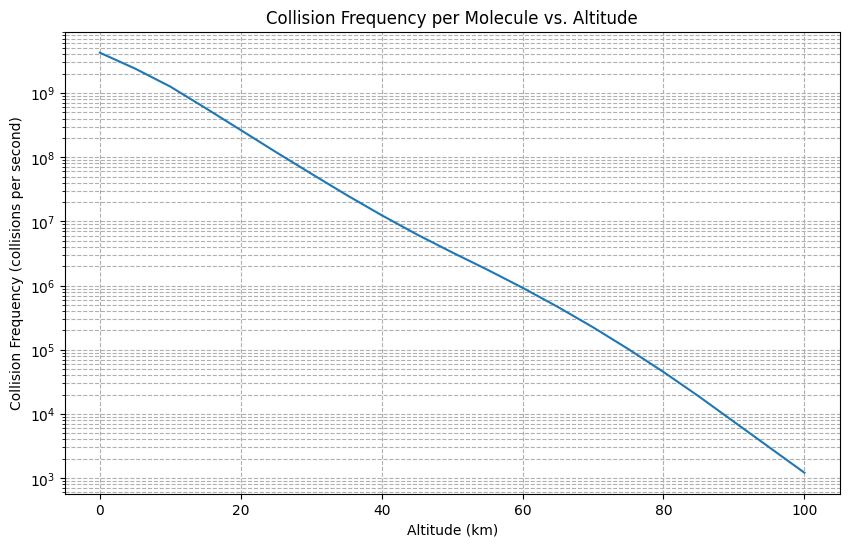

In [6]:
import matplotlib.pyplot as plt

altitudes = []
collision_frequencies = []

for h_km in altitudes_km:
    altitude = h_km * 1e3  # Convert km to meters
    altitudes.append(h_km)

    # Get temperature and pressure at this altitude
    T, P = get_temperature_pressure(altitude)

    # Number density of air molecules (n) using ideal gas law: P = n k_B T
    n = P / (k_B * T)  # molecules per cubic meter

    # Average thermal speed (v_avg) of air molecules
    v_avg = np.sqrt((8 * k_B * T) / (np.pi * m_air))

    # Collision frequency per molecule: Z = n * sigma_coll * v_avg
    Z = n * sigma_coll * v_avg  # collisions per second
    collision_frequencies.append(Z)

# Plotting
plt.figure(figsize=(10, 6))
plt.semilogy(altitudes, collision_frequencies)
plt.title('Collision Frequency per Molecule vs. Altitude')
plt.xlabel('Altitude (km)')
plt.ylabel('Collision Frequency (collisions per second)')
plt.grid(True, which="both", ls="--")
plt.show()
